<a href="https://colab.research.google.com/github/amandazevedo01/MachineLearning_/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (2).xlsx


In [ ]:
df = pd.read_excel('AdventureWorks.xlsx')

In [ ]:
df.head()

In [ ]:
#qtde de linhas e colunas
df.shape

(904, 16)

In [ ]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# Qual foi a receita total ? 
df['Valor Venda'].sum()

5984606.1426

In [ ]:
#CUSTO
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [ ]:
df.head()

In [ ]:
#qual custo total ? 
# round coloca as casas decimais
round(df['Custo'].sum(),2)

2486783.05

In [ ]:
#CALCULANDO O LUCRO
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [ ]:
#TOTAL LUCRO
round(df['Lucro'].sum(),2)

3497823.09

In [ ]:
#Quanto tempo de envio ? 
#dt.days é pra pegar apenas os dias, se nao ele vem '24 Days' com dt.days vem 24
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [ ]:
#media do tempo de envio para cada marca
df.groupby('Marca')['Tempo Envio'].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo Envio, dtype: float64

In [ ]:
#verificando se tem valor nulo
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

In [ ]:
#Lucro por ano e por marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
#RESETANDO O INDEX
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
#QUAL TOTAL DE PRODUTOS VENDIDOS ? 
df.groupby(df['Produto'])['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

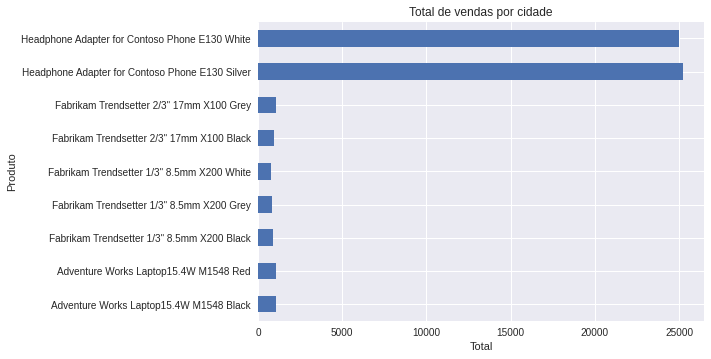

In [ ]:
#GRAFICO TOTAL DE PRODUTOS VENDIDOS
import matplotlib.pyplot as plt
df.groupby('Produto')['Quantidade'].sum().plot.barh(title='Total de vendas por cidade')
plt.xlabel('Total')
plt.ylabel('Produto')

Text(0, 0.5, 'receita')

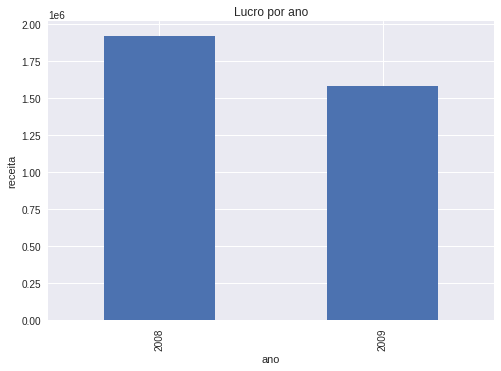

In [ ]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro por ano')
plt.xlabel('ano')
plt.ylabel('receita')

In [ ]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [ ]:
#SELECIONANDOA APENAS VENDAS DE 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [ ]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

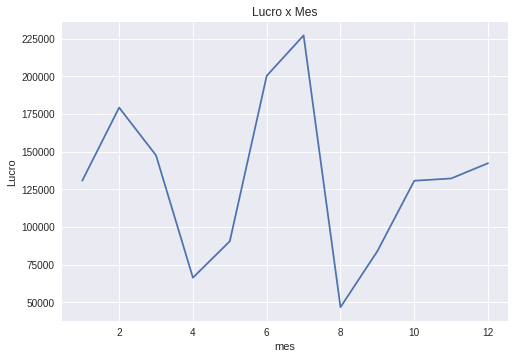

In [ ]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro x Mes')
plt.xlabel('mes')
plt.ylabel('Lucro')

Text(0, 0.5, 'Lucro')

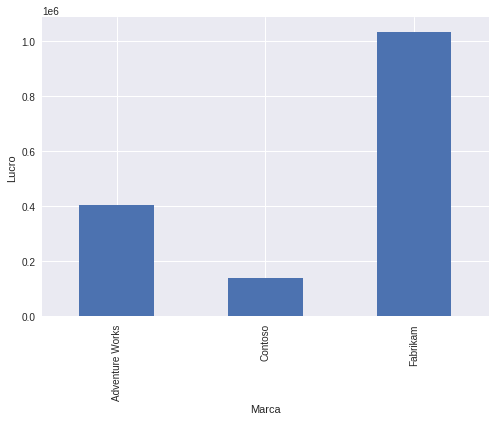

In [ ]:
df_2009.groupby('Marca')['Lucro'].sum().plot.bar('Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')

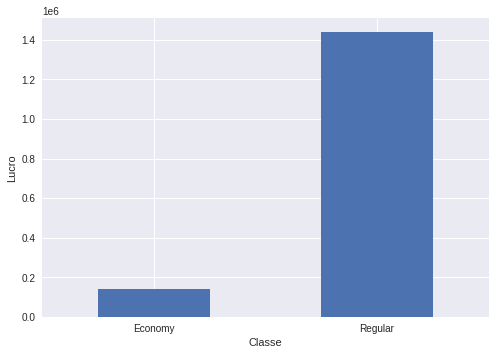

In [ ]:
df_2009.groupby('Classe')['Lucro'].sum().plot.bar('Lucro x Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [ ]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

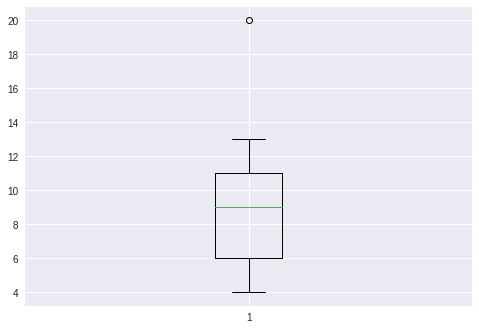

In [ ]:
#GRAFICOS DE BOXPLOT
plt.boxplot(df['Tempo Envio']);

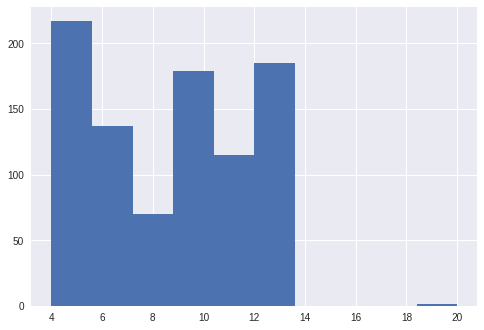

In [ ]:
#HISTOGRAMA
plt.hist(df['Tempo Envio']);

In [ ]:
#tempo minimo de envio
df['Tempo Envio'].min()

4

In [ ]:
#tempo max de envio
df['Tempo Envio'].max()

20

In [ ]:
#qual ponto outlier ? 
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
#salvando
#df.to_cvs('df_vendaas_novo.csv',index=Fase)